# How Long Do bikers Stay On Bike Transportation?
## by Noah Akachi


## Investigation Overview
 
> My ivnvestigation is supposed to look at how long bikers spent on the bikes. The main focus is on the time spent with the bikes by the people who use bike share for their transportation.

## Dataset Overview

>The dataset initially contained 183,412 rows and 16 columns of record about individual bike rides  made in a bike-sharing system covering the greater San Francisco Bay area.7 columns were dropped as they were not needed for the analysis and 1 new column was added making the final count of columns a 10. 25,501 rows were removed from the dataset due to inconsistencies or missing information, bringing the final coun tof the rows to 157,911.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike=pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
s = bike['start_station_longitude'].astype(str)

e = bike['end_station_longitude'].astype(str)

def strip_char(x):
    return x.strip()[1:]
    

bike['start_station_longitude'] = e.apply(strip_char)
bike['end_station_longitude'] = e.apply(strip_char)

In [4]:
bike['start_station_longitude']=bike['start_station_longitude'].astype(float)

bike['end_station_longitude']=bike['end_station_longitude'].astype(float)

In [5]:
# engineer the distance from the longitude and latitude of the start and end location
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km


for index, row in bike.iterrows():
    bike.loc[index, 'distance'] = haversine(row['start_station_longitude'], row['start_station_latitude'], row['end_station_longitude'], row['end_station_latitude'])

In [6]:
bike['duration_min'] = bike['duration_sec'] /60
bike['duration_min'] = bike['duration_min'].astype(int)

In [7]:
# convert the start time column to datatime data type
bike['start_time'] = pd.to_datetime(bike['start_time'])

# convert the end time column to datatime data type
bike['end_time'] = pd.to_datetime(bike['end_time'])

In [8]:
# get the day from the start date 
dow_map={0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday' }

bike['day_of_week'] = bike['start_time'].dt.dayofweek.map(dow_map)

In [9]:
bike['member_birth_year'].replace(1878.0, 1978.0, inplace=True)

# drop all null values in the dataset
bike=bike.dropna()

In [10]:
# convert the year datatype to int
bike['member_birth_year'] = bike['member_birth_year'].astype(int)

In [11]:
# records where age is older than 100 is probably error and is dropped
above_max_age = bike[bike['member_birth_year'] <= (2022-100)].index
bike.drop(above_max_age, inplace=True)

In [12]:
bike.shape

(174878, 19)

In [13]:
# engineer the age from the birth year column
bike['age'] = 2022 - bike['member_birth_year']

In [14]:
# drop columns that will not be need for the exploration to answer the research question
bike.drop(['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_latitude',
          'start_station_longitude', 'end_station_id','end_station_latitude', 'end_station_longitude',
          'bike_id', 'member_birth_year'], axis=1, inplace=True)

In [15]:
# format the distance column to 2 dp
bike['distance'] = bike['distance'].round(decimals=2)

In [16]:
bike.shape

(174878, 9)

In [17]:
# convert the day of week to an ordered categorical variable of type weekday ordered from sunday to saturday
weekday=['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ordered_days=pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
bike['day_of_week'] = bike['day_of_week'].astype(ordered_days)

In [18]:
bike.shape

(174878, 9)

In [19]:
# engineer a speed column from the duration column
bike['speed'] = bike['distance'] / bike['duration_min']

In [20]:
# find and drop rows were distance column had error values
print(bike[bike['duration_min']== 1409])

above_max_distance = bike[bike['distance'] == bike.distance.max()].index
bike.drop(above_max_distance, inplace=True)

                                 start_station_name      end_station_name  \
85465  Powell St BART Station (Market St at 4th St)  Myrtle St at Polk St   

        user_type member_gender bike_share_for_all_trip  distance  \
85465  Subscriber          Male                      No       0.1   

       duration_min day_of_week  age     speed  
85465          1409    Saturday   41  0.000071  


In [21]:
bike.shape

(174877, 10)

In [22]:
# the record with the max speed value is impossible given the duration and also had duplicates
bike[bike['speed'] == bike.speed.max()]

# the record and its duplicates is dropped
bike = bike.drop([29462, 147692])

bike = bike[bike['distance'] != 0]

# look for duplicates
# bike.duplicated().sum()

# drop duplicates
bike = bike.drop_duplicates()

# the record with the max speed value is impossible given the duration and also had duplicates
bike[bike['speed'] == bike.speed.max()]


# the record and its duplicates is dropped
bike = bike.drop([49079])

In [23]:
bike.shape

(157219, 10)

In [24]:
# look for records where the speed is greater than the average speed for an average bike rider
bike[(bike['duration_min'] == 1) & (bike['speed'] >=0.70)]

# drop the records
bike = bike.drop([9508, 11898,13342,23008,48831,68544,87599,90652,129831,148547,156956,165499,174705,180705  ])

In [25]:
bike.shape

(157205, 10)

In [26]:
bike.describe()

,distance,duration_min,age,speed
count,157205.000000,157205.000000,157205.000000,157205.000000
mean,1.227861,11.170287,37.222207,0.137556
std,1.030648,26.525399,9.917825,0.083436
min,0.010000,1.000000,21.000000,0.000012
25%,0.480000,5.000000,30.000000,0.070000
50%,0.960000,8.000000,35.000000,0.135714
75%,1.680000,13.000000,42.000000,0.194286
max,8.910000,1409.000000,95.000000,0.680000


In [27]:
bike.head()

,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,distance,duration_min,day_of_week,age,speed
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,No,0.51,869,Thursday,38,0.000587
2,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,No,1.90,1030,Thursday,50,0.001845
3,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,Other,No,0.17,608,Thursday,33,0.000280
4,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,Male,Yes,1.32,26,Thursday,48,0.050769
5,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,Male,No,3.07,29,Thursday,63,0.105862


## Distribution of minutes spent on bike


>The values of the  minutes had large range of values from, from 0 to about 1500.This distribution is plotted on a logarithmic scale and the distribution is multimodal

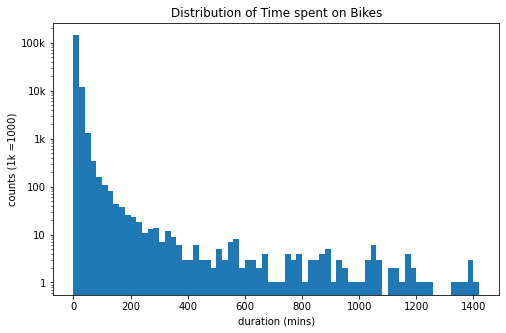

In [28]:
# set bins and plot the log transform histogram
bins = np.arange(0, bike['duration_min'].max()+ 20,20)
plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'duration_min',bins=bins);
plt.title('Distribution of Time spent on Bikes');
plt.xlabel('duration (mins)');
plt.ylabel('counts (1k =1000)');
plt.yscale('log')
plt.yticks([10**0, 10**1,10**2,10**3,10**4,10**5], ['1','10','100','1k','10k','100k']);
# plt.xlim(800, 1400)

## Distribution of Distance rode on Bike

>The distance is measured in kilometers. It is a unimodal distribution with the bulk of the distribution occuring between 0 and 10 km.

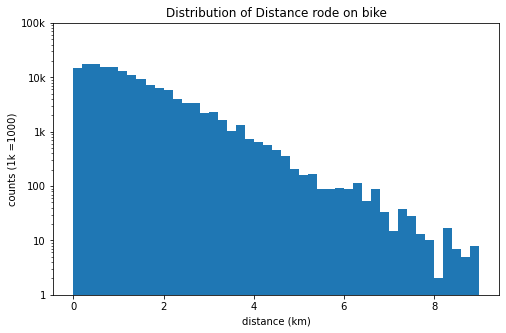

In [29]:
# set bins and plot histogram
bins = np.arange(0, bike['distance'].max()+ 0.2,0.2)
plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'distance',bins=bins);
plt.xlabel('distance (km)');
plt.ylabel('counts (1k =1000)');
plt.yscale('log')
plt.yticks([10**0, 10**1,10**2,10**3,10**4,10**5], ['1','10','100','1k','10k','100k']);
plt.title('Distribution of Distance rode on bike');

## Distribution of Members who use bike share for all their trips.

There are more than 140,000 pepople who are not using bike share for all their trips and less than 20,000 who are using it for all their trips

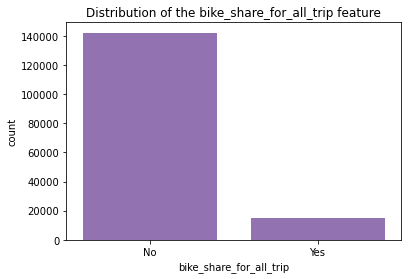

In [30]:
color=sb.color_palette()[4]

sb.countplot(data=bike, x='bike_share_for_all_trip', color=color).set(title='Distribution of the bike_share_for_all_trip feature');

## Duration by Bike share for all trips and gender

It is seen here that the other genders who did not use bike share for all their trips spend almost 17.5 mins on average on bikes  which is the highest amount of time by any gender. The males spend 10 mins on average on bike, both for all their trips and part of their trips each.

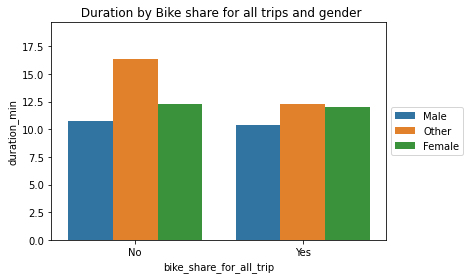

In [31]:
# plt.rcParams.update({'font.size': 11}) # must set in top
ax = sb.barplot(data=bike, x='bike_share_for_all_trip', y='duration_min', hue='member_gender', errwidth=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
plt.title(' Duration by Bike share for all trips and gender');

## Duration by Bike share for all trips and user type

All the customers did not use bike share for all their trips hence they spent at an average almost 20 min of their time on bikes. The customers on the other hand spend 10 min each whether they are using it for all their trips or only part of their trip.

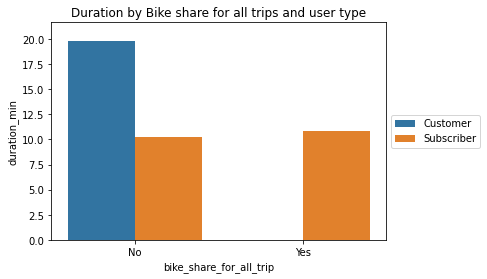

In [32]:
# plt.figure(figsize=(15,14))
# plt.rcParams.update({'font.size': 11}) # must set in top
ax = sb.barplot(data=bike, x='bike_share_for_all_trip', y='duration_min', hue='user_type', errwidth=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
plt.title('Duration by Bike share for all trips and user type');

## Duration by Bike share for all trips and days of the week

saturdays and sundays are when people spend the most time on bikes. People spend an average of 13 mins on bikes on saturdays and sundays.When they do not use bikes for all their trips, they spend an average of 12min as well.

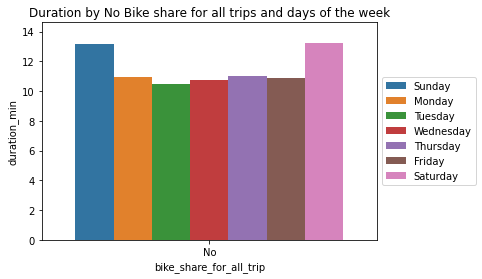

In [33]:
bike_share_no = bike.where(bike['bike_share_for_all_trip'] == 'No')

ax = sb.barplot(data=bike_share_no, x='bike_share_for_all_trip', y='duration_min', hue='day_of_week', errwidth=0);
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
plt.title('Duration by No Bike share for all trips and days of the week');

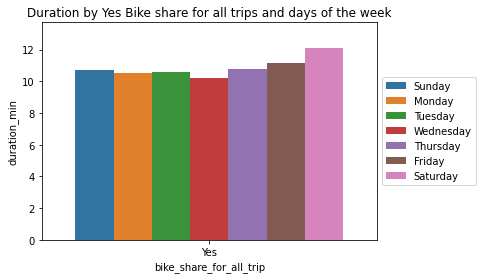

In [34]:
bike_share_yes = bike.where(bike['bike_share_for_all_trip'] == 'Yes')

ax = sb.barplot(data=bike_share_yes, x='bike_share_for_all_trip', y='duration_min', hue='day_of_week', errwidth=0);
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
plt.title('Duration by Yes Bike share for all trips and days of the week');

In [ ]:
!jupyter nbconvert Bike_Transport_Project_Pt2.ipynb --to slides --post serve --no-input --no-prompt